# Clear Day Detection

This notebook illustrates the usage of the `find_clear_days` function. This algorithm estimates the clear days in a data set two ways and then combines the estimates for the final estimations. The first estimate is based on the "smoothness" of each daily power signal. The second estimate is based on the seasonally adjusted daily energy output of the system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('..')
from solardatatools.clear_day_detection import find_clear_days
from solardatatools.data_transforms import make_2d
from solardatatools.dataio import get_pvdaq_data

In [2]:
df = get_pvdaq_data(sysid=35, api_key='DEMO_KEY', year=[2011, 2012, 2013])

This function, like many in this project, relay on a matrix embedding of the time series power signal. The data transformationfunction `make_2d` handles this for us.

In [3]:
D = make_2d(df, key='dc_power')

Pass the matrix embedding of the data to the clear day finding function. This returns a boolean array with a length equal to the number of days in the data set.

In [4]:
clear_days = find_clear_days(D)

Plot the results.

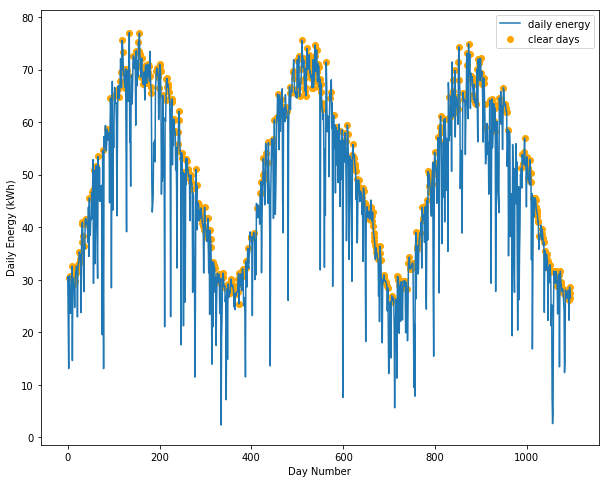

In [5]:
plt.figure(figsize=(10,8))
daily_energy = np.sum(D, axis=0) * (24 / D.shape[1]) / 1000
plt.plot(daily_energy, label='daily energy')
xset = np.arange(D.shape[1])
plt.scatter(xset[clear_days], daily_energy[clear_days], color='orange', label='clear days')
plt.legend()
plt.xlabel('Day Number')
plt.ylabel('Daily Energy (kWh)')
plt.show()